<a href="https://colab.research.google.com/github/Mohammed287-lab/ANN/blob/main/linera_Regression_with_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sre_constants import error
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets,model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression


In [6]:
df=pd.read_csv("boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
df=df.rename(columns={"medv":"target","rm":"RM","lstat":"LSTAT" })
df.head()

,crim,zn,indus,chas,nox,RM,age,dis,rad,tax,ptratio,b,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
df[["LSTAT","RM","target"]].head()

,LSTAT,RM,target
0,4.98,6.575,24.0
1,9.14,6.421,21.6
2,4.03,7.185,34.7
3,2.94,6.998,33.4
4,5.33,7.147,36.2


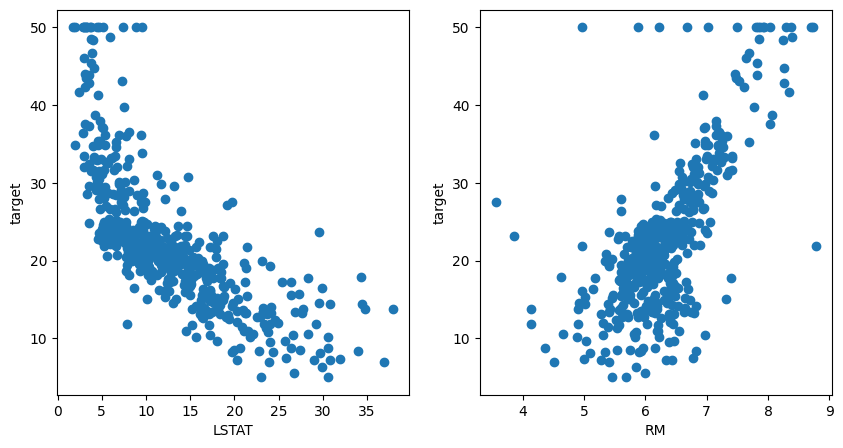

In [15]:
plt.figure(figsize=(10,5))
features=["LSTAT","RM"]
target =df["target"]

plt.subplot(1,2,1)
plt.scatter(df["LSTAT"],target)
plt.xlabel("LSTAT")
plt.ylabel("target")

plt.subplot(1,2,2)
plt.scatter(df["RM"],target)
plt.xlabel("RM")
plt.ylabel("target")
plt.show()



In [16]:
X_train,X_test,Y_train,y_test = train_test_split(df[features],df["target"],test_size=0.2,random_state=23)

In [17]:
from sklearn.linear_model import LinearRegression


In [18]:
model=LinearRegression()

In [20]:
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

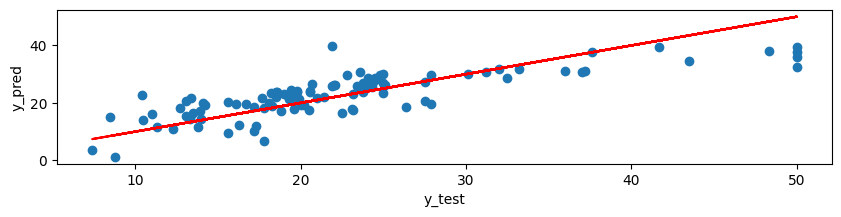

In [37]:
plt.figure(figsize=(10,2))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color="red")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [38]:
intercept=model.intercept_
coff=model.coef_


In [39]:
intercept

0.37428615187841885

In [40]:
coff

array([-0.66721079,  4.88331552])

In [41]:
mse=mean_squared_error(y_test,y_pred)
print('Mean square Error:',mse)

mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute Error:',mae)
r2=r2_score(y_test,y_pred)
print('R2 Score:',r2)

Mean square Error: 30.726065211573893
Mean absolute Error: 4.300122669036365
R2 Score: 0.6433023932639312


In [42]:
from types import new_class
new_house_data={
    'LSTAT':[5.0,4.0,15.0],
    'RM':[7,6,8]
}
new_house_df =pd.DataFrame(new_house_data)
new_house_df


,LSTAT,RM
0,5.0,7
1,4.0,6
2,15.0,8


In [43]:
pridected_house_price=model.predict(new_house_df)
pridected_house_price

array([31.22144086, 27.00533613, 29.43264846])

In [44]:
new_house_df["pridected_house_price"]=pridected_house_price
new_house_df

,LSTAT,RM,pridected_house_price
0,5.0,7,31.221441
1,4.0,6,27.005336
2,15.0,8,29.432648
